In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1512,2020-09-03,United Kingdom,338615.0,338676.0,41542.0,41514.0,-61.0,28.0
1513,2020-09-03,Germany,245982.0,246116.0,9322.0,9321.0,-134.0,1.0
1514,2020-09-03,Iran,381185.0,378752.0,21928.0,21797.0,2433.0,131.0
1515,2020-09-03,Turkey,273007.0,273301.0,6452.0,6462.0,-294.0,-10.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  8301.163480553725
RMSE =  32456.476355136925


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  301.56690837178644
RMSE =  744.3896027521903


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  58782.618055555555
RMSE =  102117.82006288537
-- World performances for deaths --
MAE =  1702.0833333333333
RMSE =  2083.2728057874065


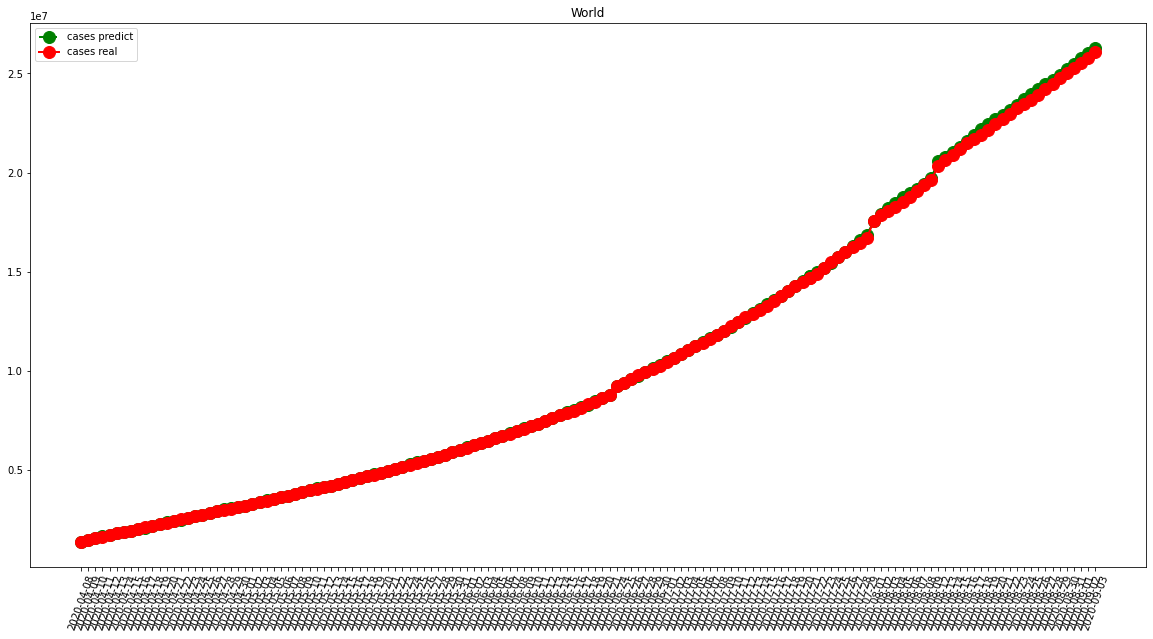

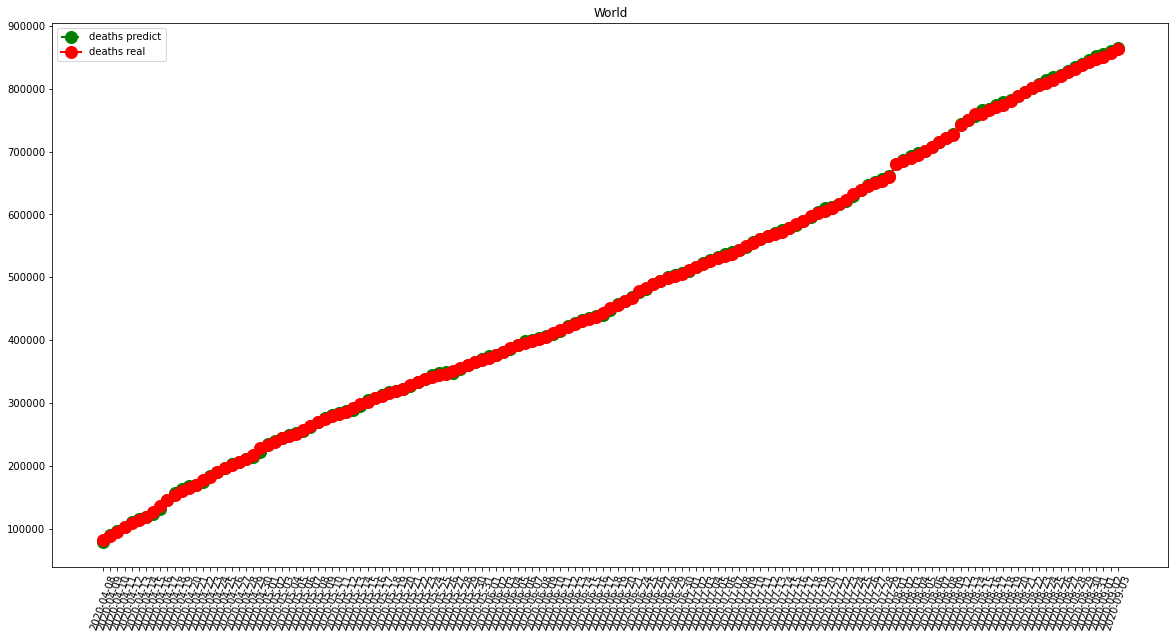

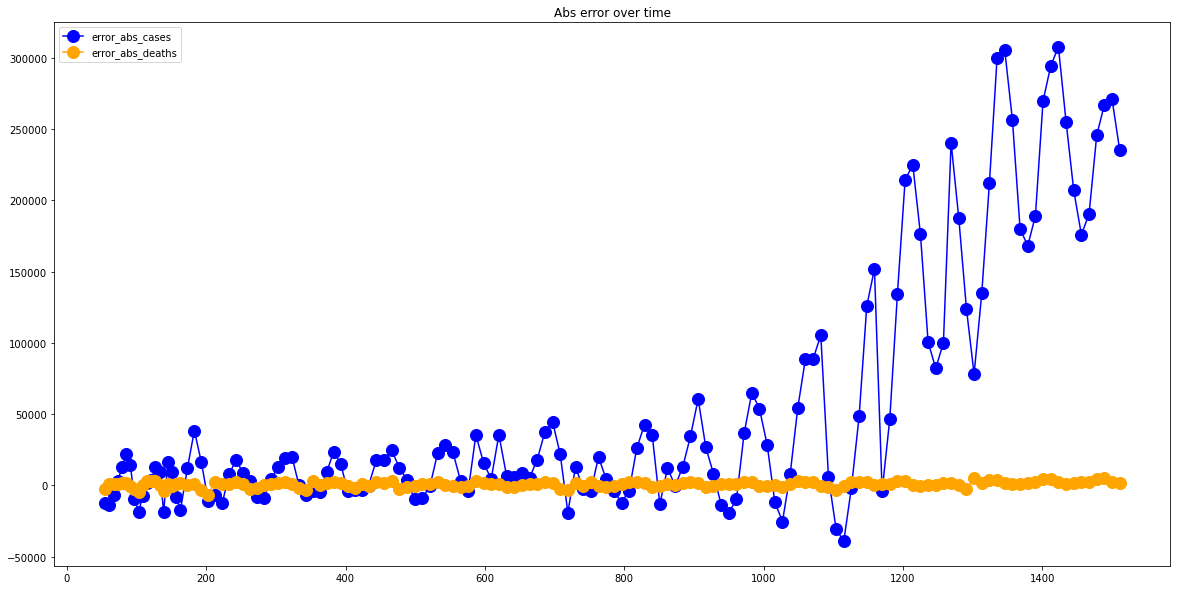

In [7]:
visShow("World")

-- France performances for cases --
MAE =  986.6883116883117
RMSE =  1488.7594330013997
-- France performances for deaths --
MAE =  121.31818181818181
RMSE =  270.2875452973317


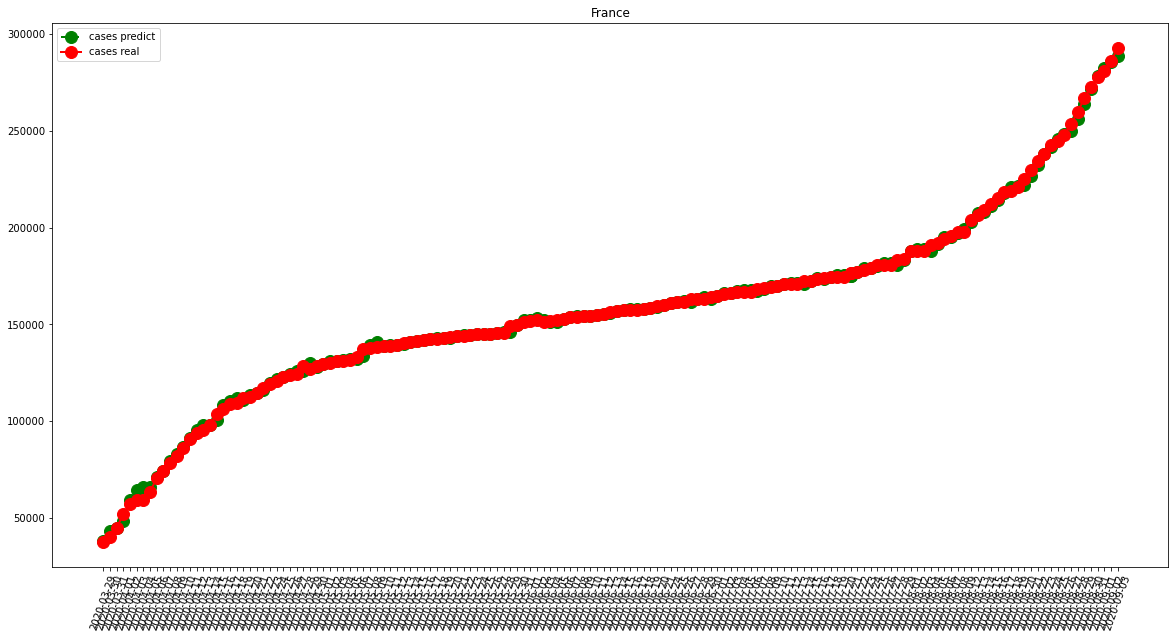

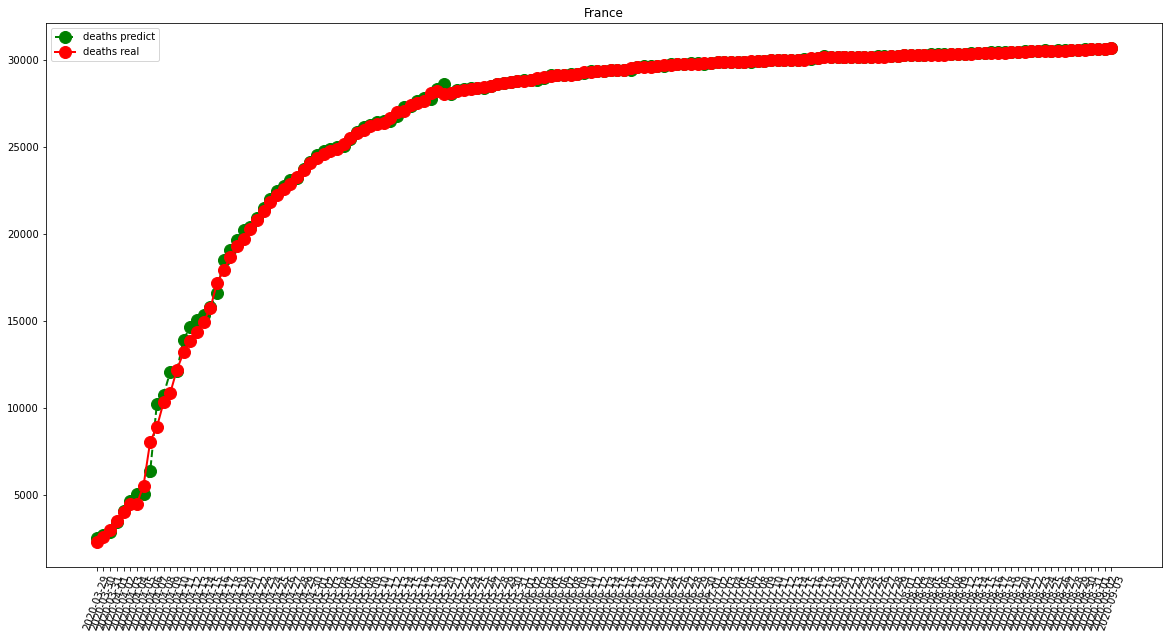

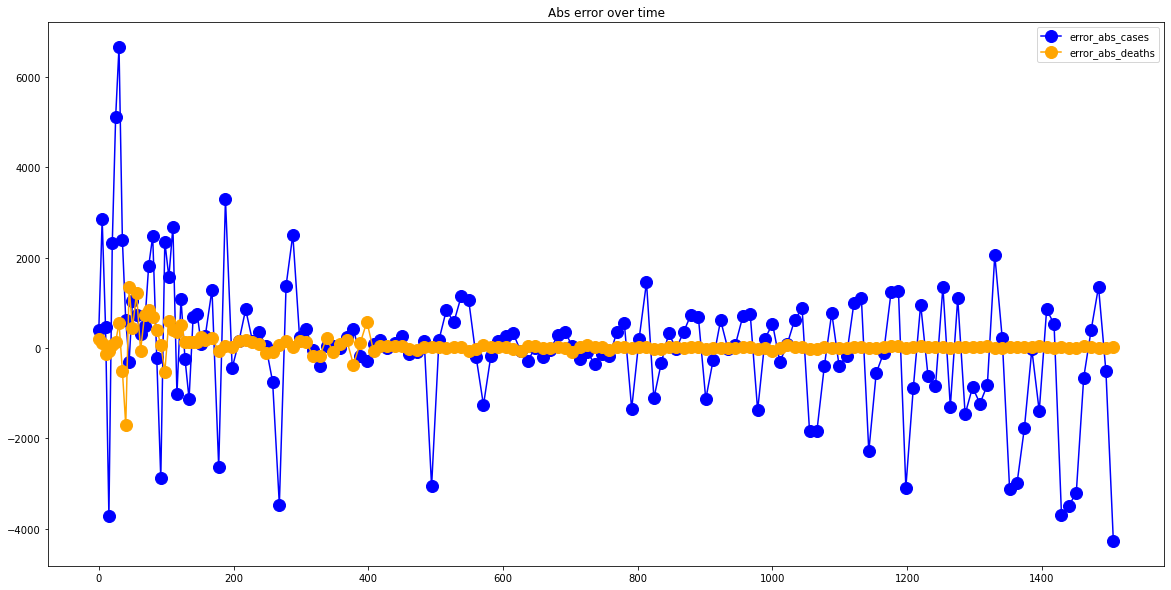

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.4025974025974
RMSE =  454.1772209743109
-- Italy performances for deaths --
MAE =  72.53896103896103
RMSE =  239.21485479218626


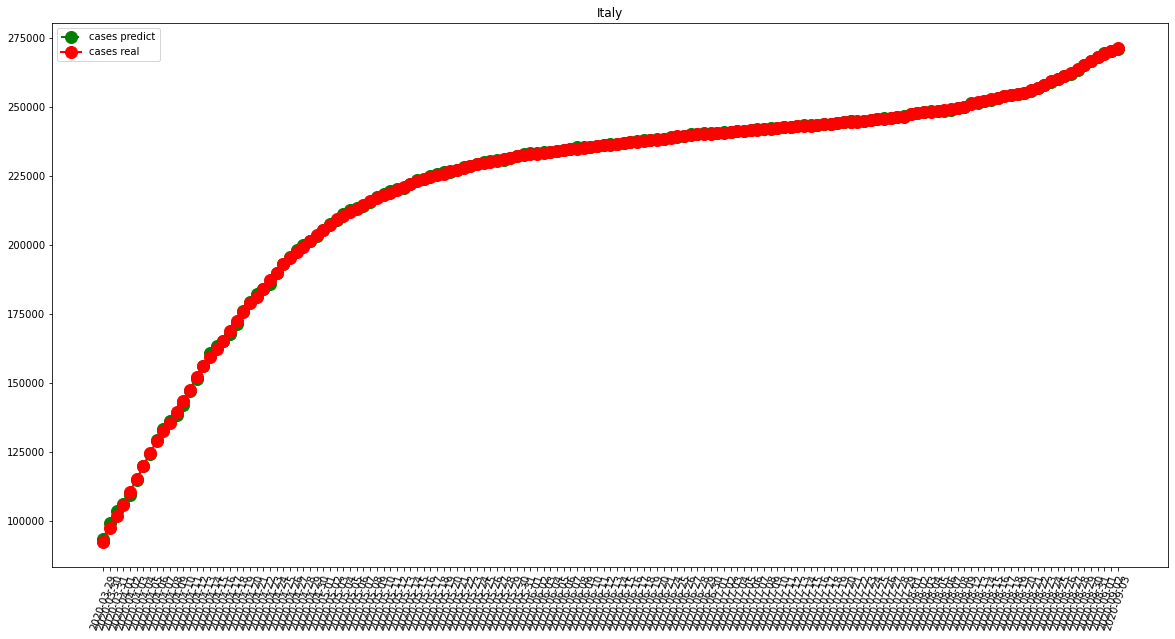

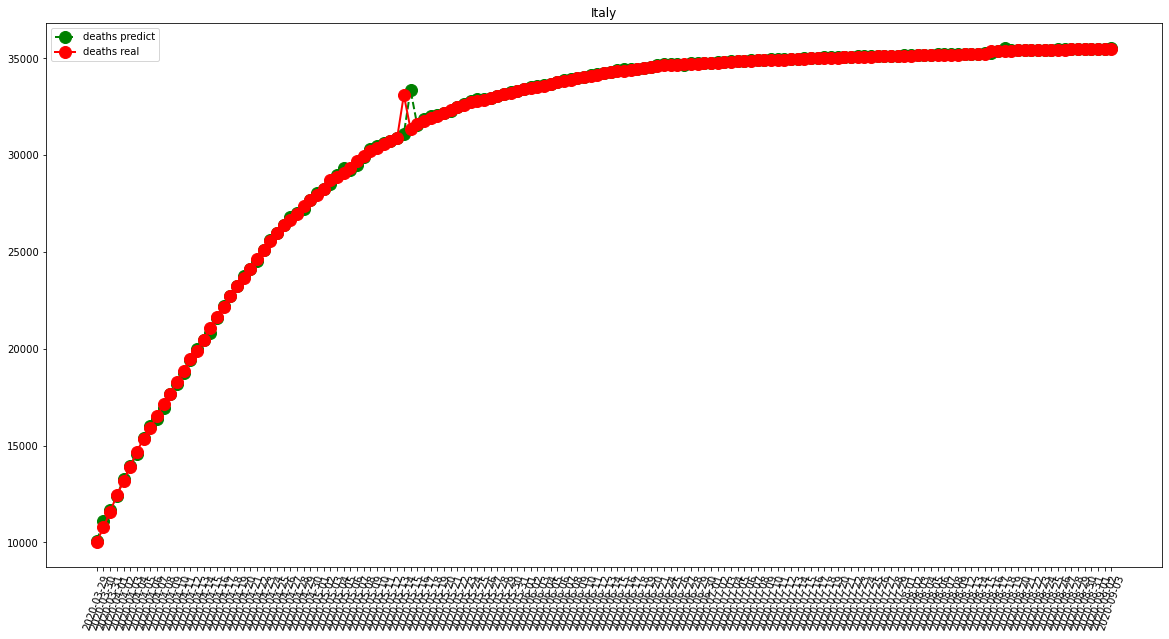

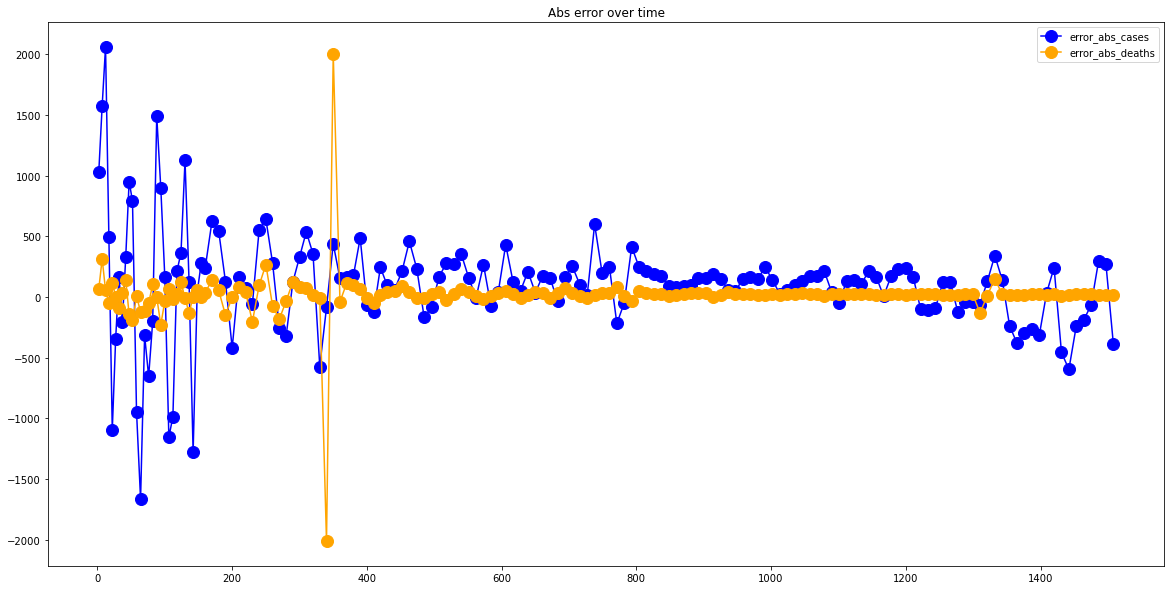

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1984.9285714285713
RMSE =  3880.7707503643032
-- Spain performances for deaths --
MAE =  125.1948051948052
RMSE =  327.4884948906057


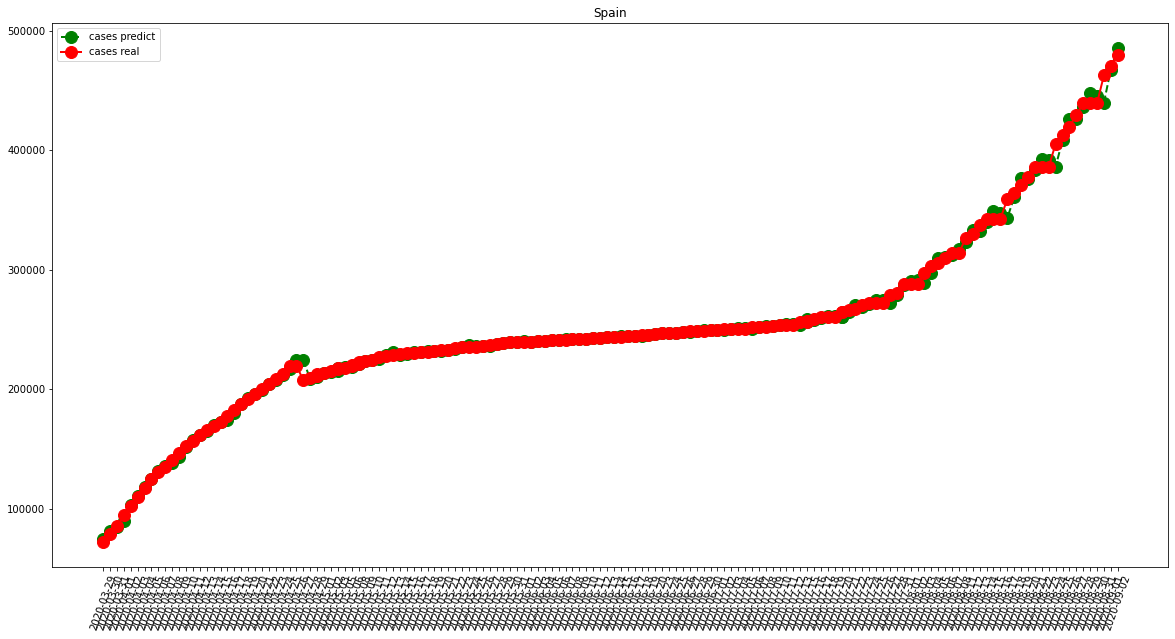

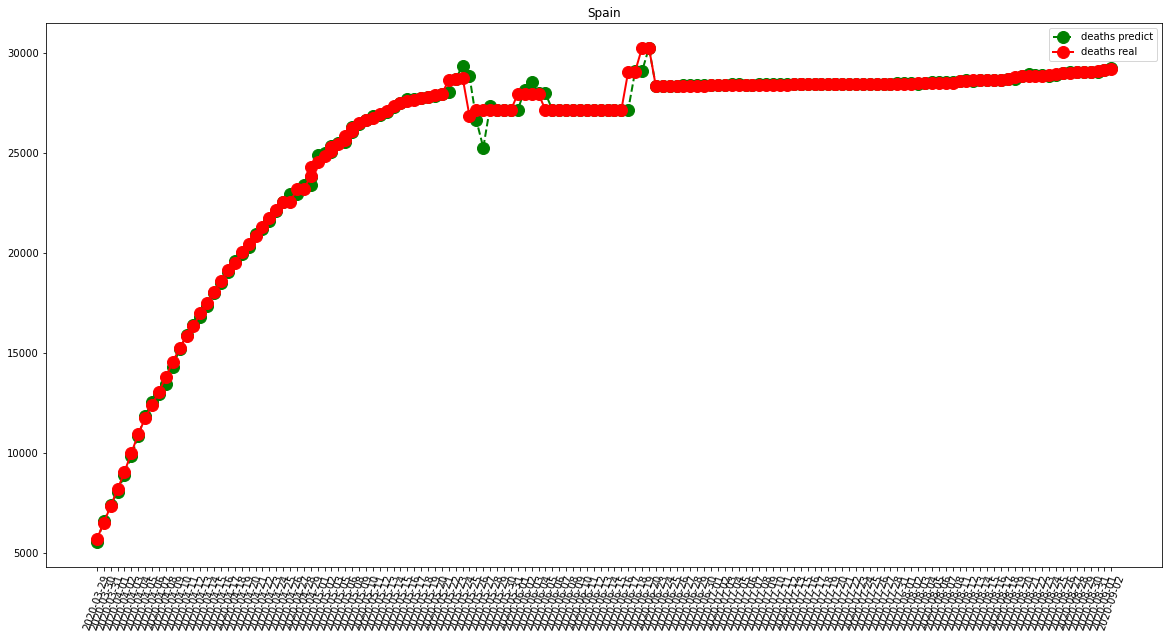

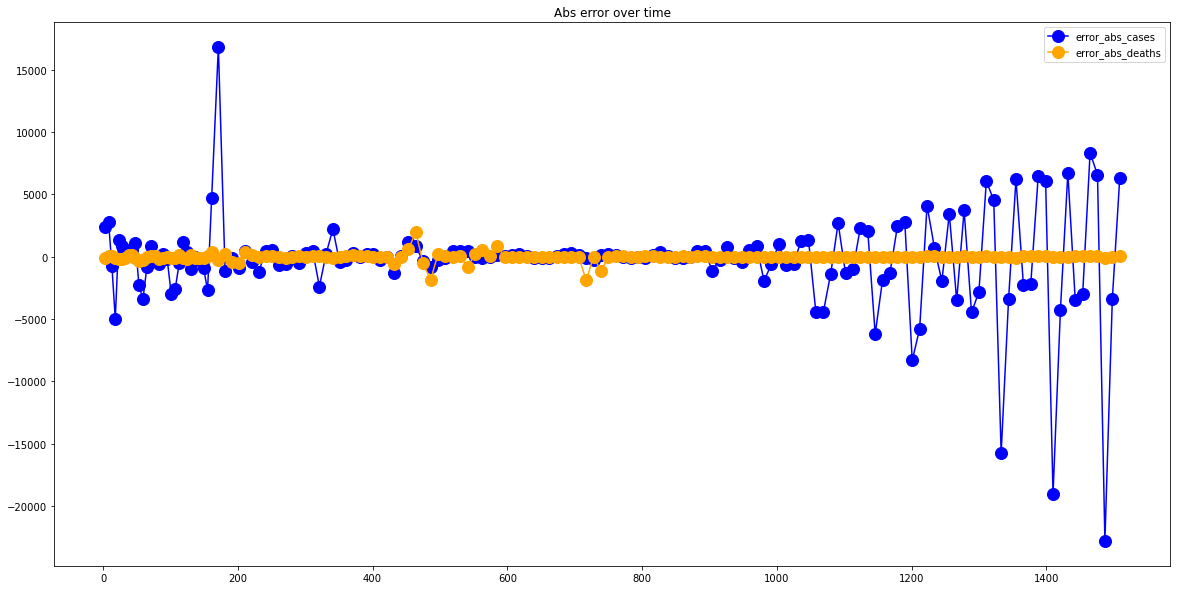

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  12474.454545454546
RMSE =  19393.675826205512
-- United States performances for deaths --
MAE =  487.77272727272725
RMSE =  689.2406936377406


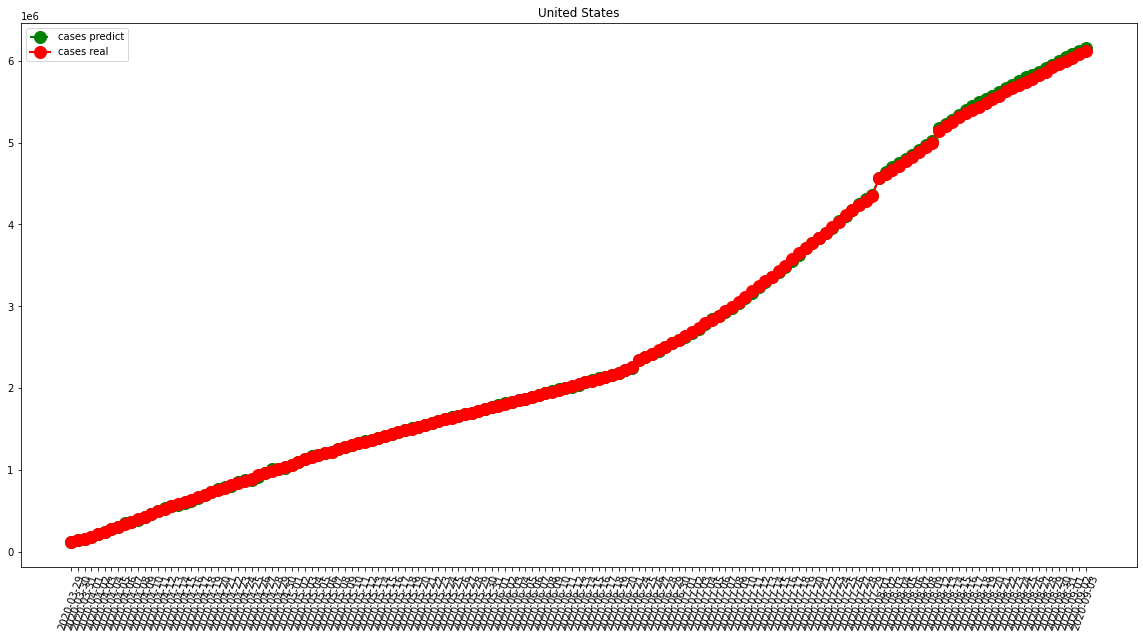

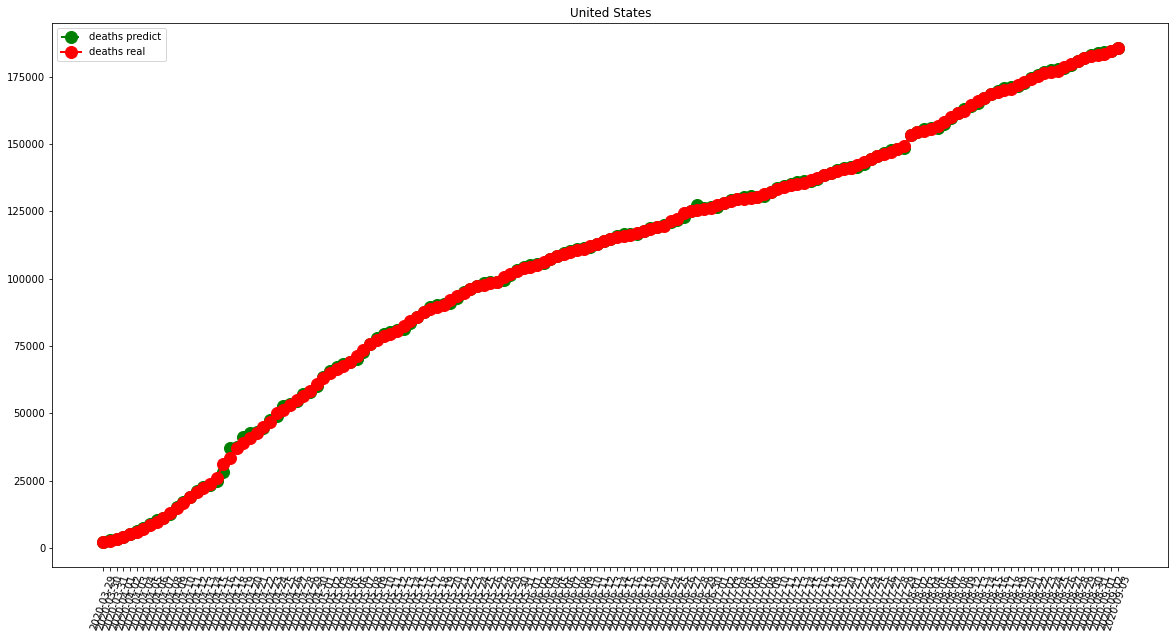

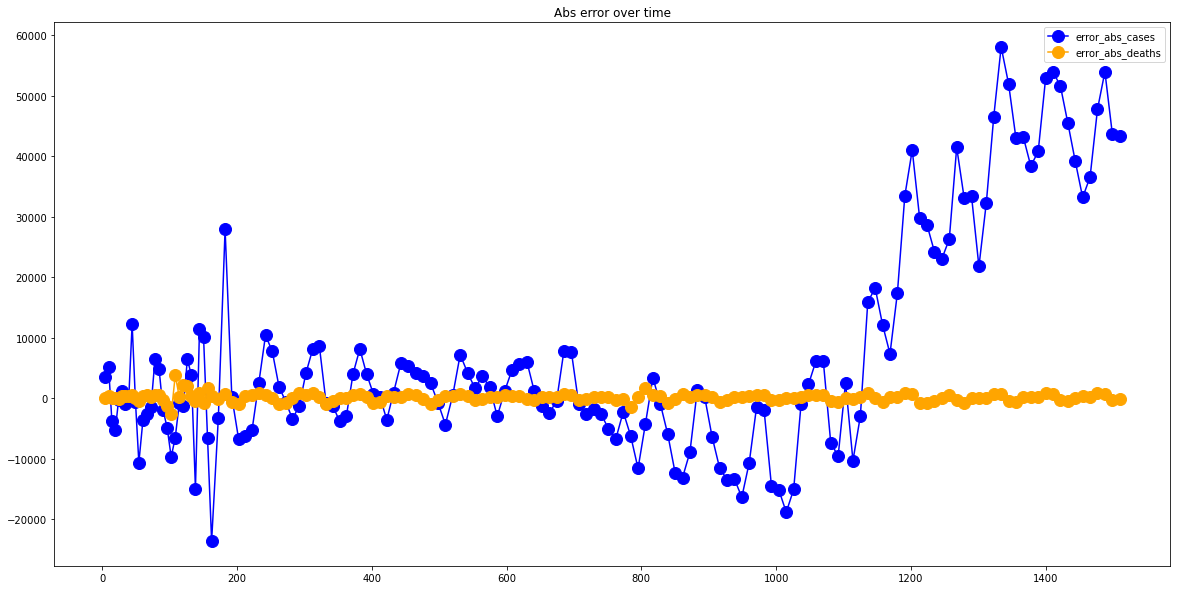

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  65.02597402597402
RMSE =  96.15186851113096
-- China performances for deaths --
MAE =  27.11038961038961
RMSE =  126.53234789940106


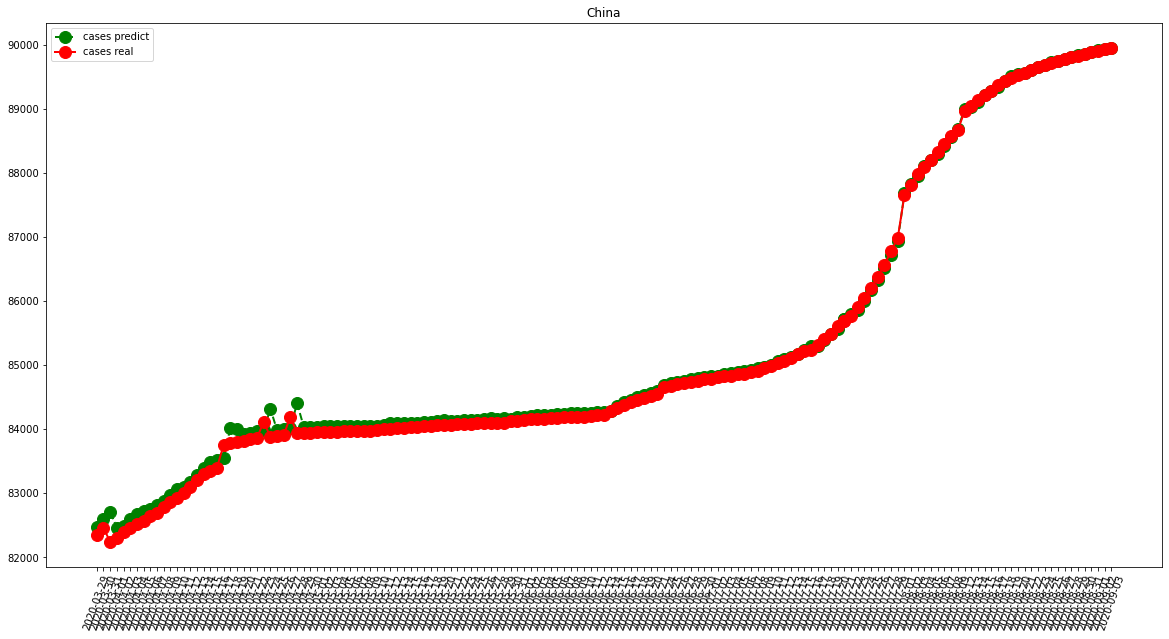

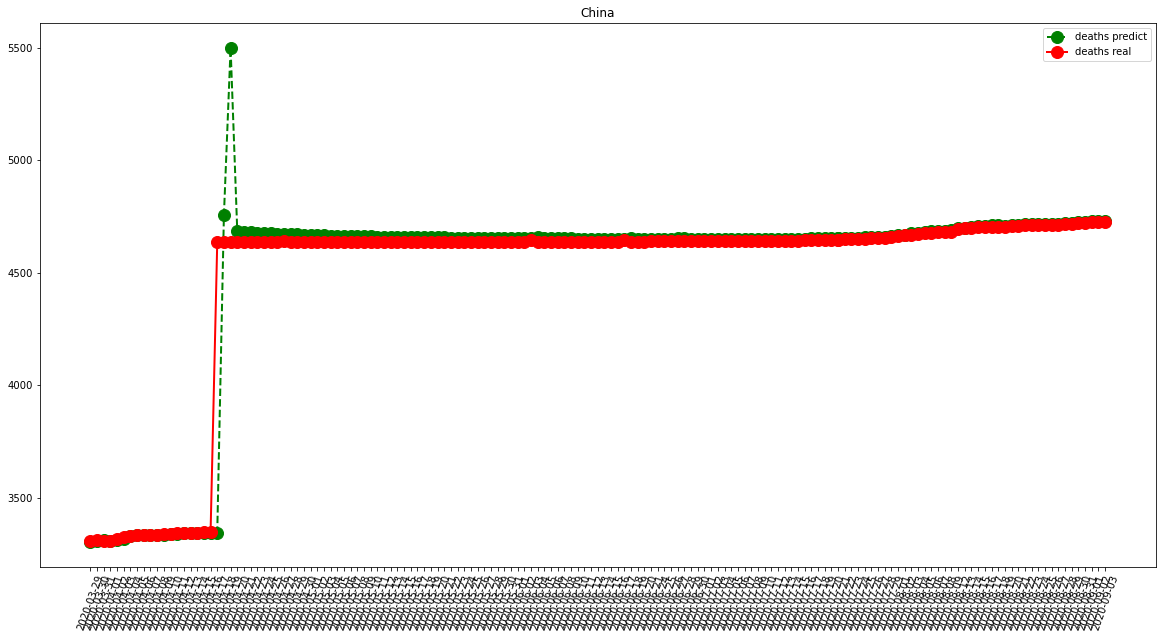

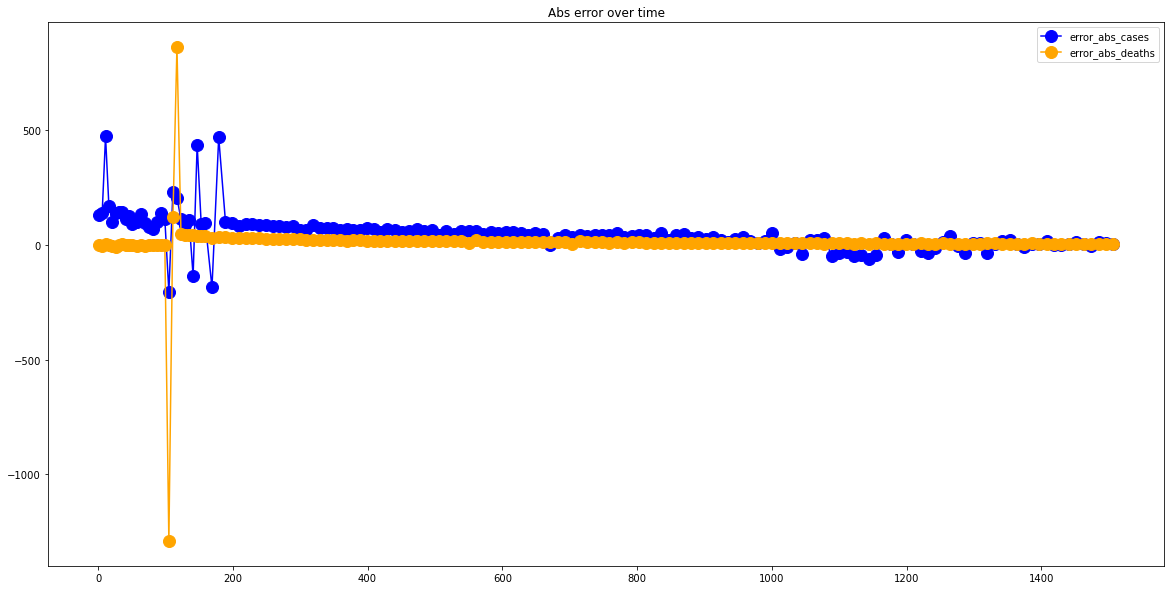

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1046.420634920635
RMSE =  3725.1940580111086
-- United Kingdom performances for deaths --
MAE =  240.4920634920635
RMSE =  760.2898570063043


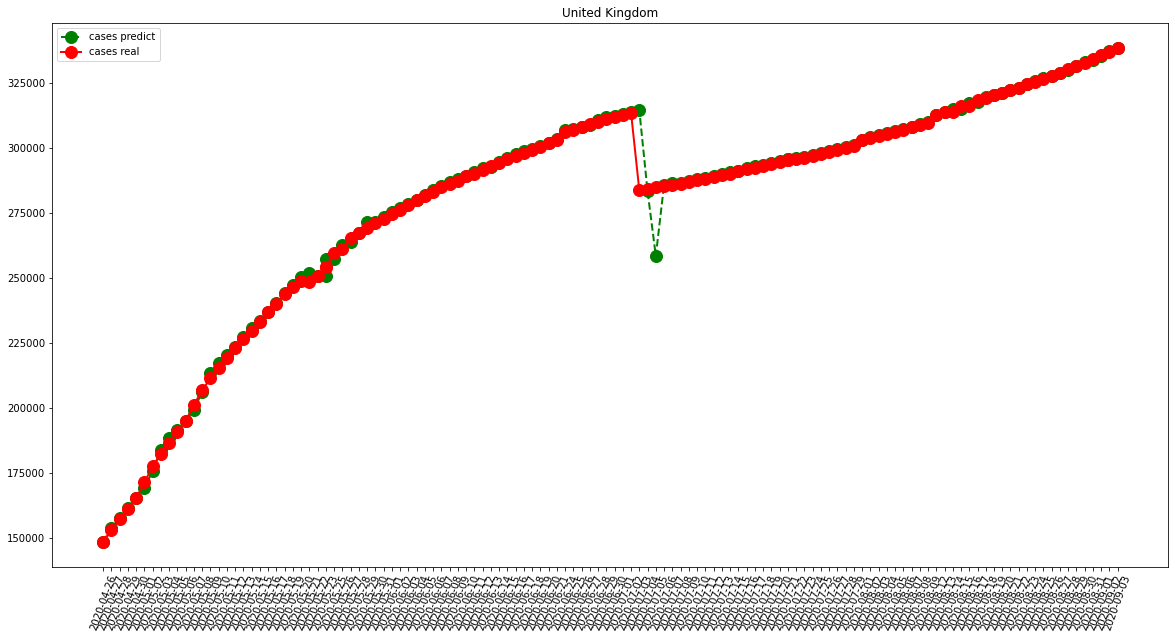

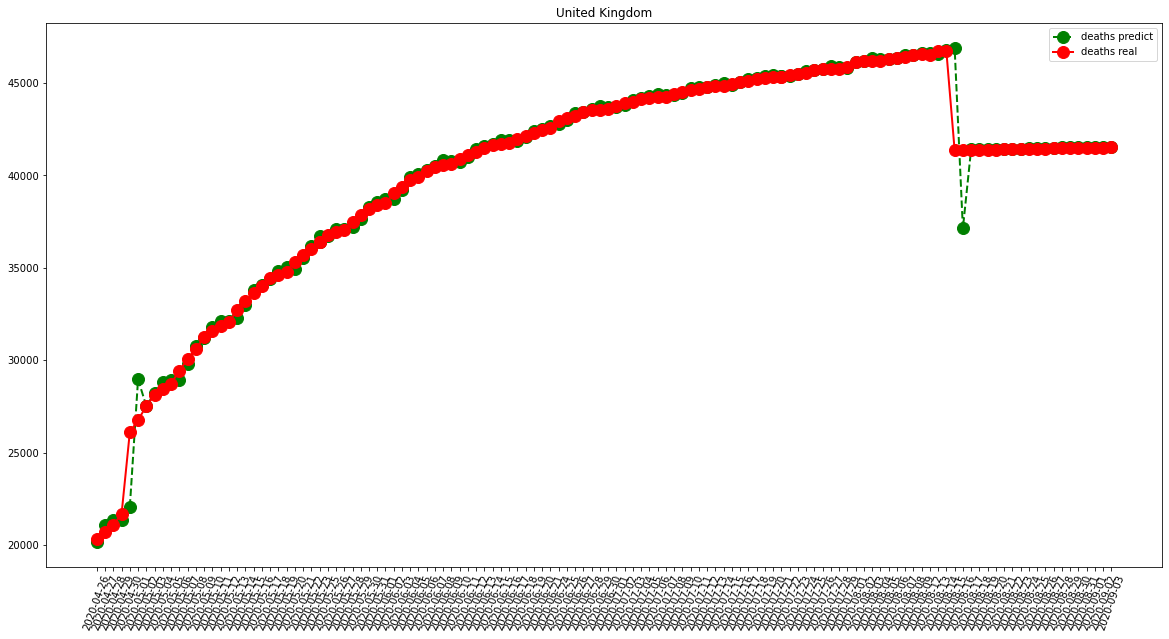

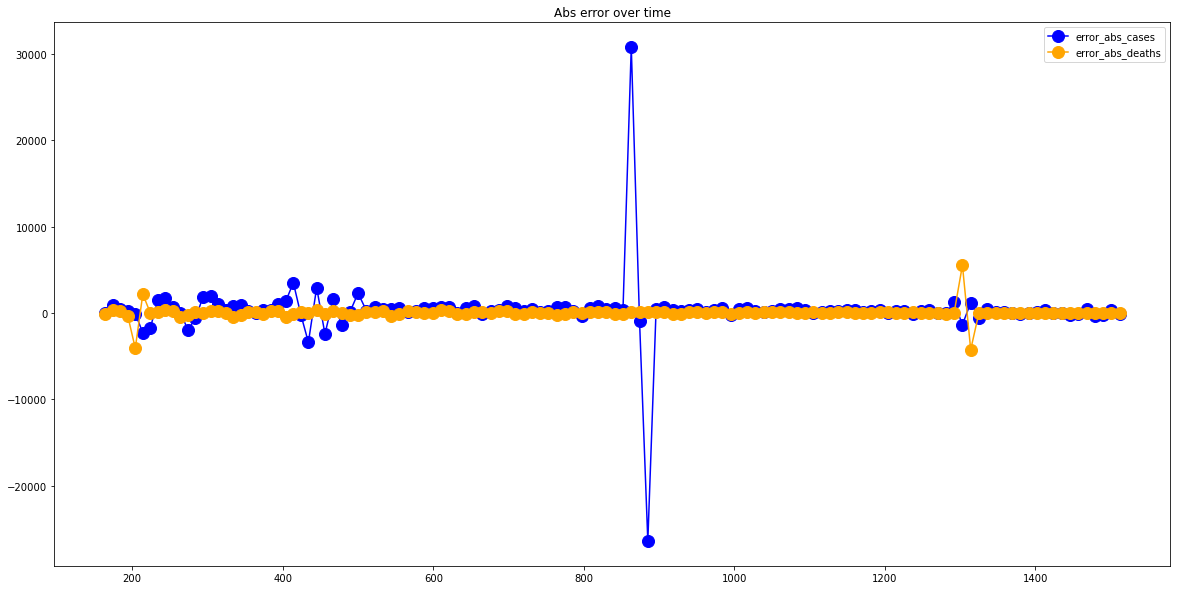

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  399.43650793650795
RMSE =  582.2370719359151
-- Germany performances for deaths --
MAE =  20.73015873015873
RMSE =  39.15151682682639


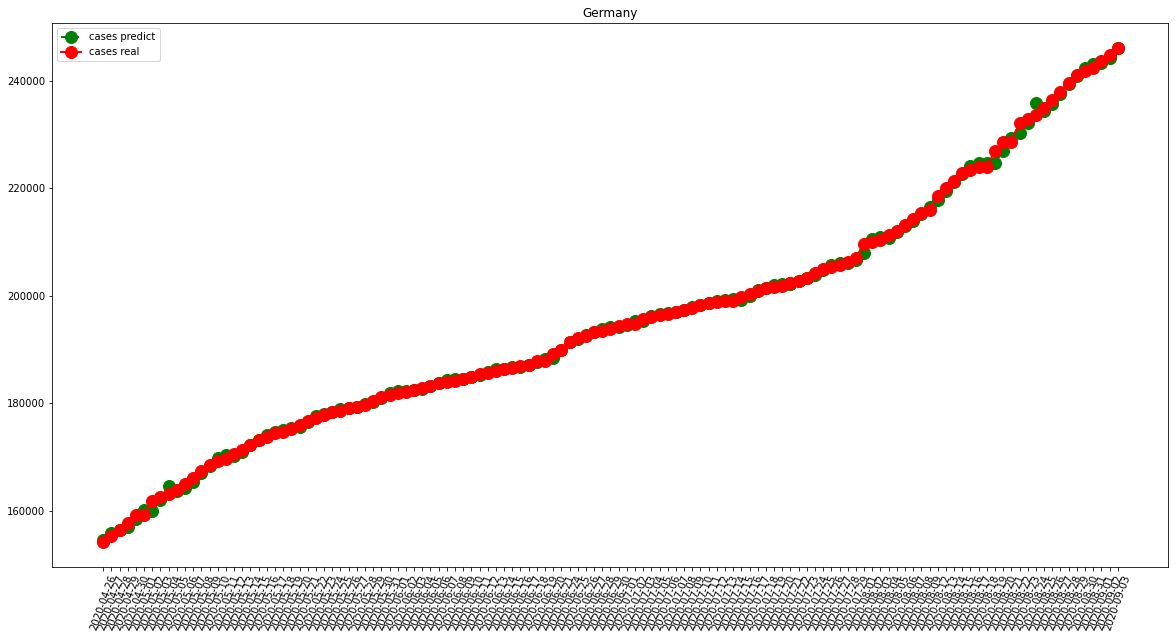

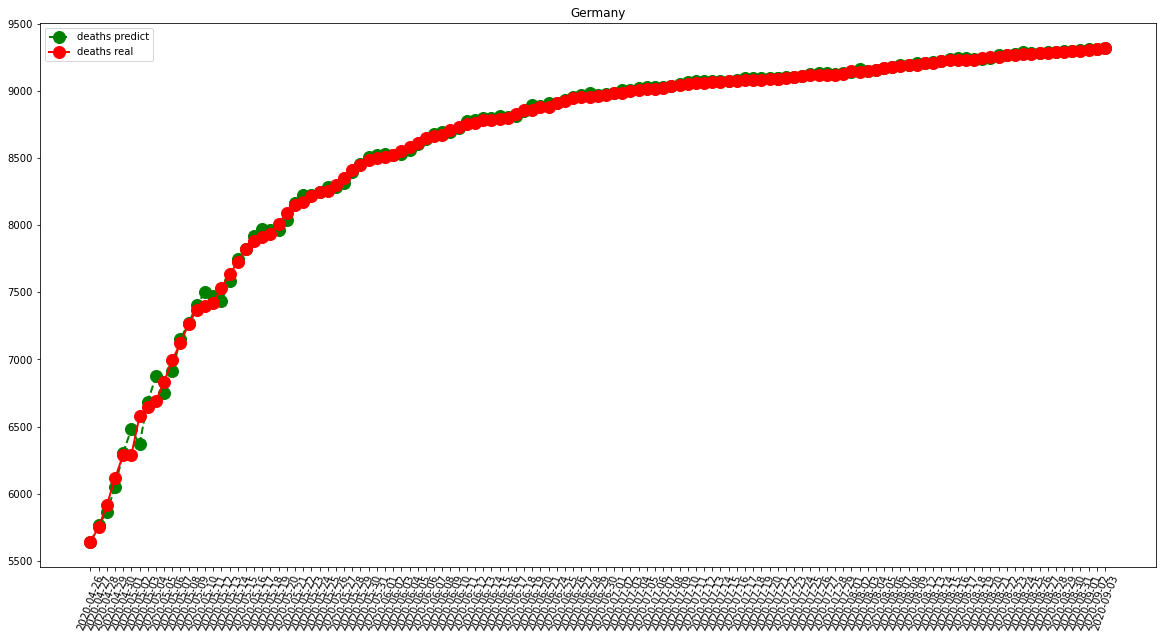

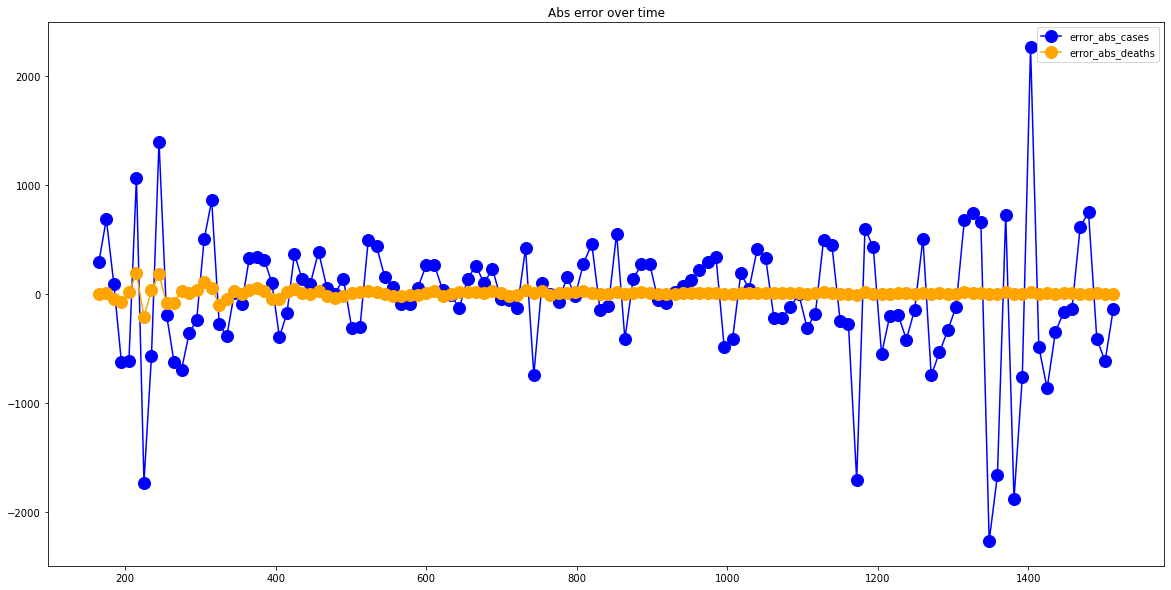

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  817.7698412698413
RMSE =  1197.3028253351595
-- Iran performances for deaths --
MAE =  46.166666666666664
RMSE =  83.51318686861603


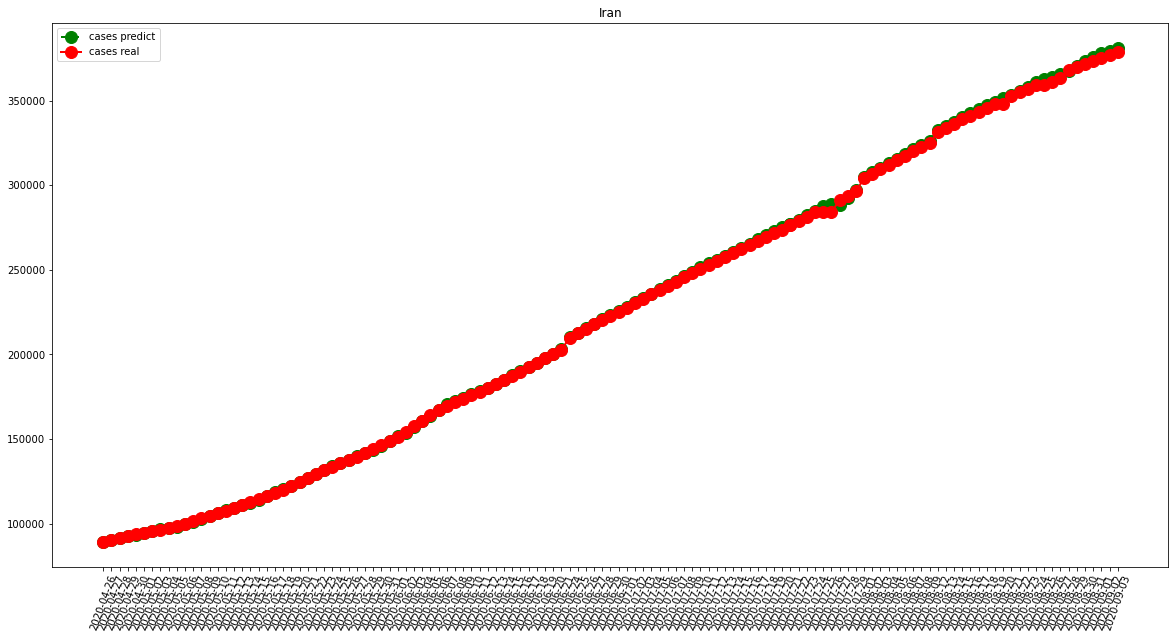

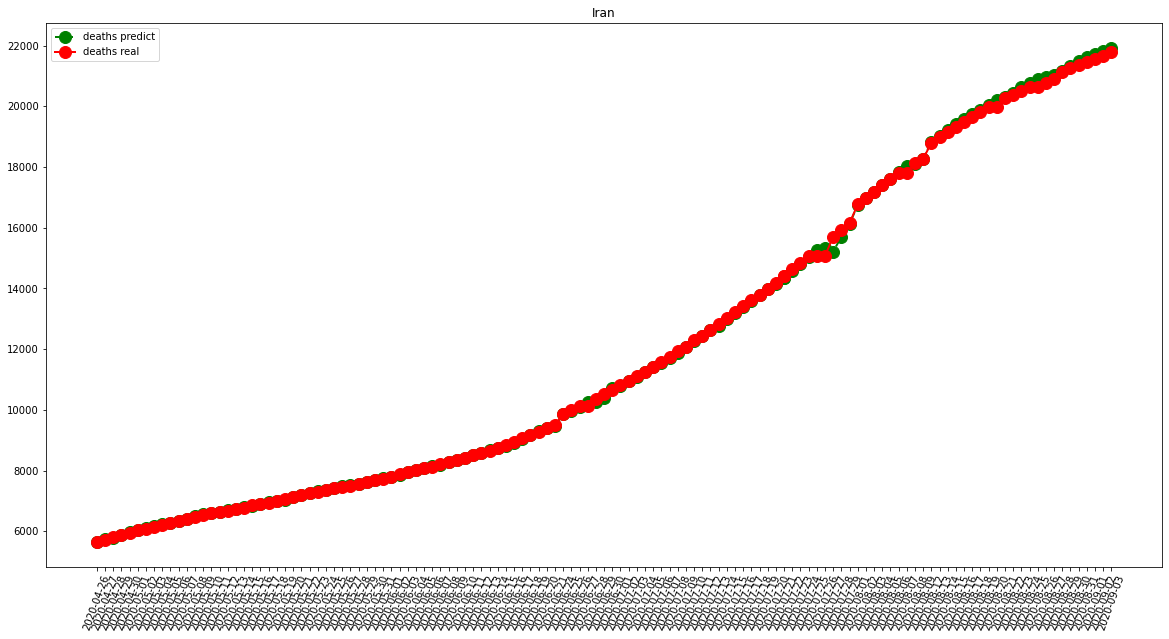

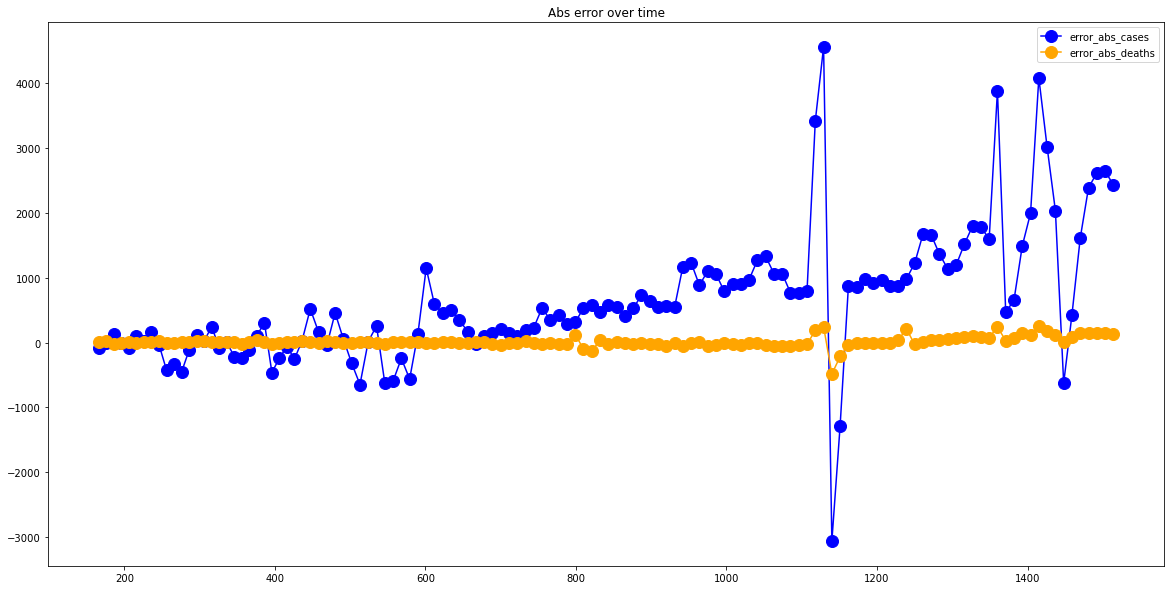

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  203.96031746031747
RMSE =  326.0278374520354
-- Turkey performances for deaths --
MAE =  16.253968253968253
RMSE =  90.50256507809205


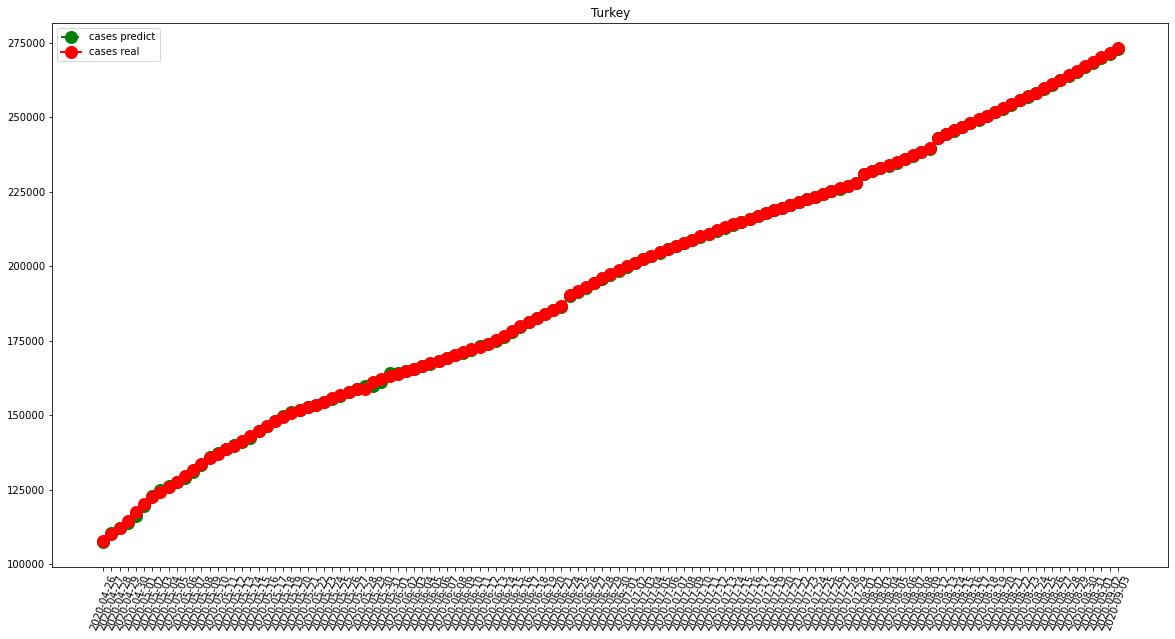

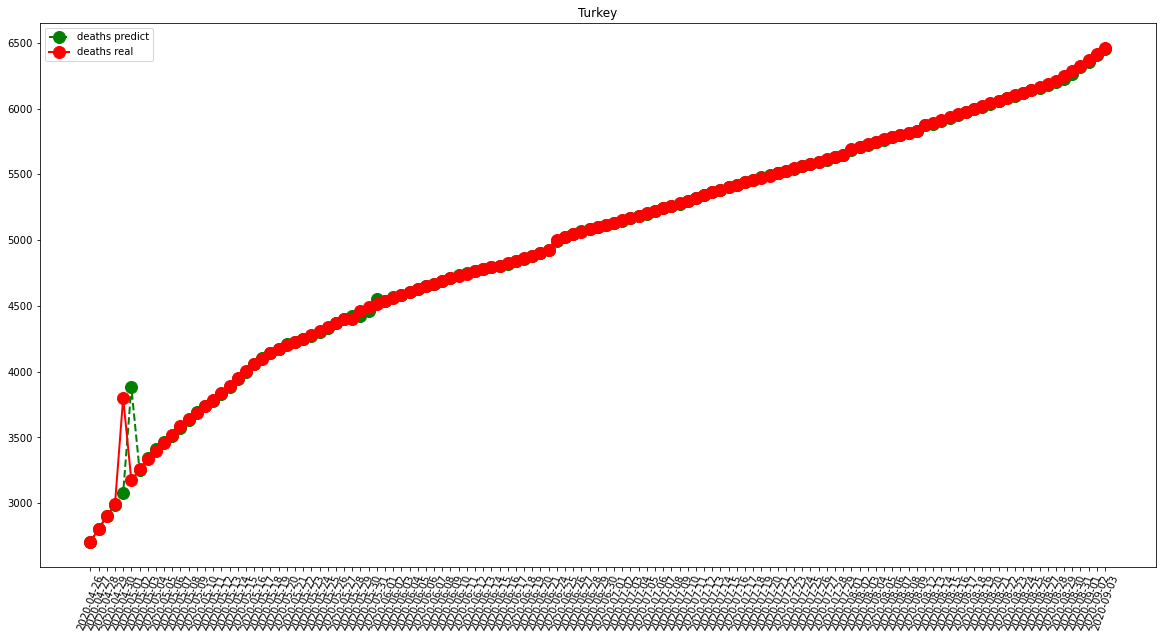

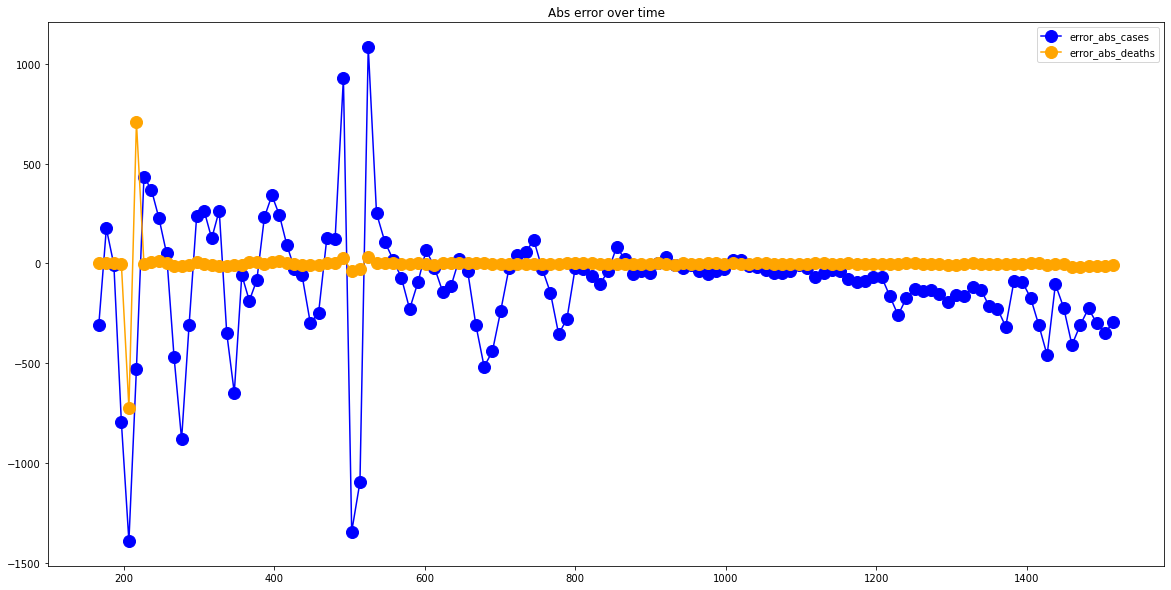

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13959.323232323231
RMSE =  18478.12707205222
-- Brazil performances for deaths --
MAE =  436.0808080808081
RMSE =  536.4494384375847


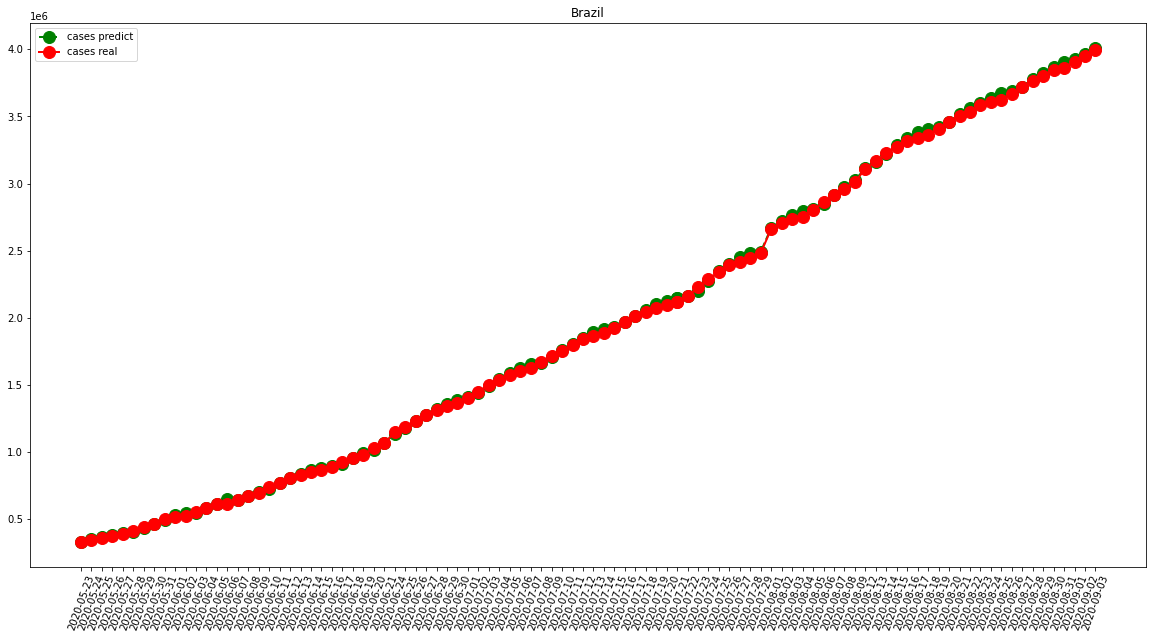

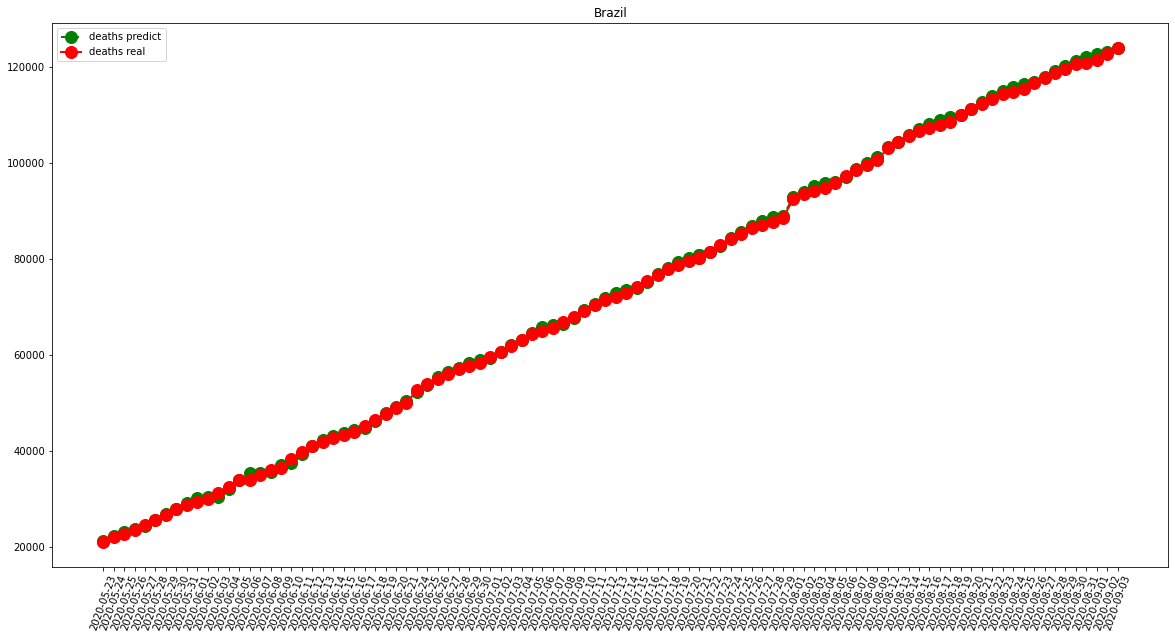

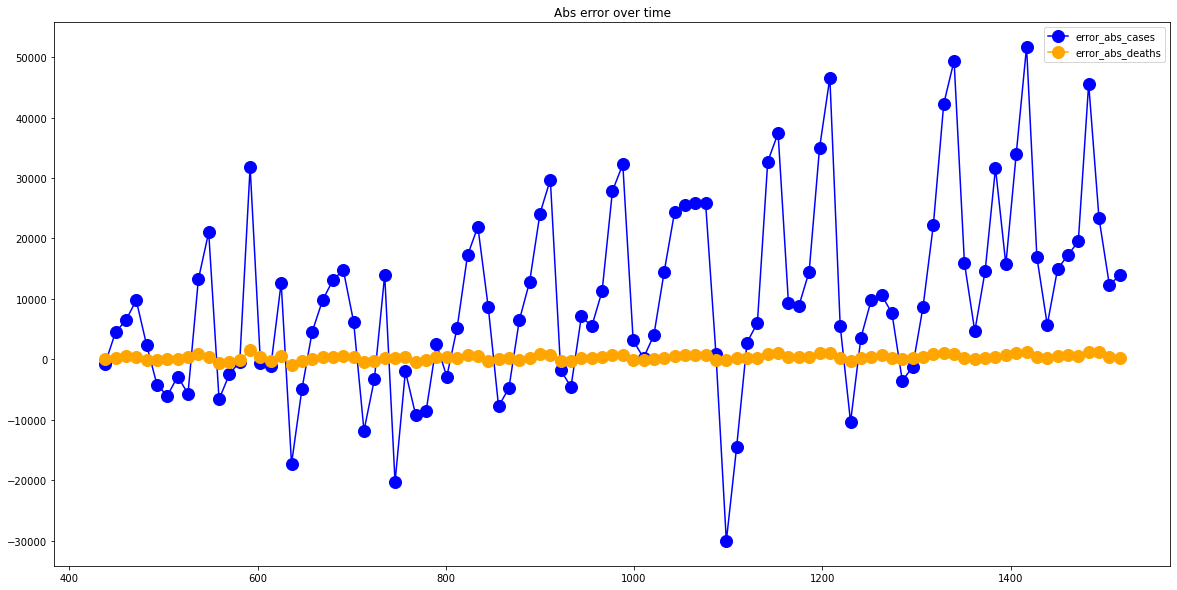

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)